### Step # 1: Import Pandas

In [1]:
# import pandas for data analysis
import pandas as pd
import datetime

### Step # 2: Load Files

In [2]:
# load files: Dimention tables: date, hotels and rooms; Fact talbes: bookings and aggregated bookings
df_bookings = pd.read_csv('data/source-code/3_project_hospitality_analysis/datasets/fact_bookings.csv')
df_date = pd.read_csv('data/source-code/3_project_hospitality_analysis/datasets/dim_date.csv')
df_hotels = pd.read_csv('data/source-code/3_project_hospitality_analysis/datasets/dim_hotels.csv')
df_rooms = pd.read_csv('data/source-code/3_project_hospitality_analysis/datasets/dim_rooms.csv')
df_agg_bookings = pd.read_csv('data/source-code/3_project_hospitality_analysis/datasets/fact_aggregated_bookings.csv')
df_august = pd.read_csv('data/source-code/3_project_hospitality_analysis/datasets/new_data_august.csv')

### Step #3 Exploratory data analysis:

#### a. Explore Bookings data

In [3]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [4]:
# 1. how many rows & columns do we have: bookings data (134590 rows and 12 columns)
df_bookings.shape

(134590, 12)

In [5]:
# 2. how many unique room categories do we have
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [6]:
# 3. how many unique booking platforms do we have
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [7]:
# 4. how many records from each booking platform
df_bookings.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

<Axes: ylabel='booking_platform'>

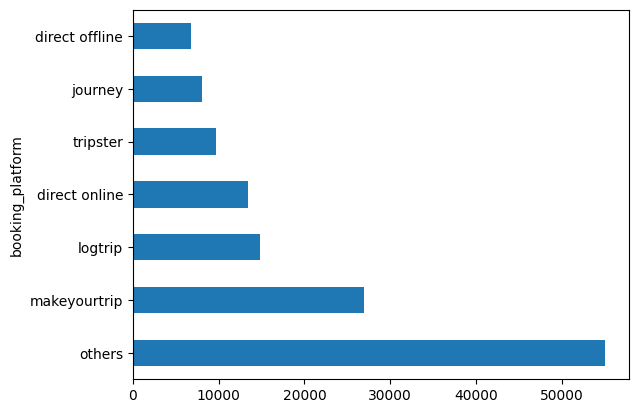

In [8]:
# 5. plot how many records from each booking platform with horizontal bar chart
df_bookings.booking_platform.value_counts().plot(kind='barh')

In [9]:
 # 6. check each column's content
df_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134590 non-null  object 
 1   property_id        134590 non-null  int64  
 2   booking_date       134590 non-null  object 
 3   check_in_date      134590 non-null  object 
 4   checkout_date      134590 non-null  object 
 5   no_guests          134587 non-null  float64
 6   room_category      134590 non-null  object 
 7   booking_platform   134590 non-null  object 
 8   ratings_given      56683 non-null   float64
 9   booking_status     134590 non-null  object 
 10  revenue_generated  134590 non-null  int64  
 11  revenue_realized   134590 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 12.3+ MB


In [10]:
# 7. check each brief statistics
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


Some guest numbers are negative, and the max revenue is too high. We'll need to do some data cleaning after exploratory data analysis

### Step # 3 Exploratory data analysis:

#### b. Explore Hotels data

In [11]:
# 1. Overview of hotel data
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [12]:
# 2. How many columns & rows are in the data table
df_hotels.shape

(25, 4)

In [13]:
# 3. how many hotels from each category
df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

In [14]:
# 4. how many hotels from each city in ascending orders
df_hotels.city.value_counts().sort_values()

city
Delhi        5
Hyderabad    6
Bangalore    6
Mumbai       8
Name: count, dtype: int64

<Axes: xlabel='city'>

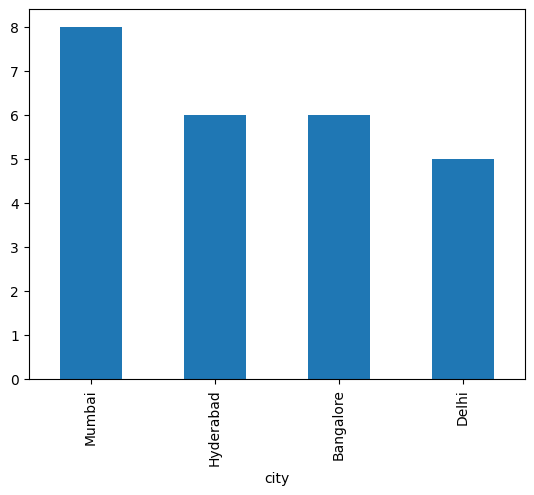

In [15]:
# 4. Plot how many hotels from each city with bar chart
df_hotels.city.value_counts().plot(kind='bar')

### Step # 3 Exploratory data analysis:

#### c. Explore Aggregate Bookings data

In [16]:
# 1. Overview of aggregate booking data
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [17]:
# 2. number of columns and rows
df_agg_bookings.shape

(9200, 5)

In [18]:
# 3. Find out unique property ids in aggregate bookings dataset
unique_property=df_agg_bookings.property_id.unique()
unique_property.sort()
unique_property

array([16558, 16559, 16560, 16561, 16562, 16563, 17558, 17559, 17560,
       17561, 17562, 17563, 17564, 18558, 18559, 18560, 18561, 18562,
       18563, 19558, 19559, 19560, 19561, 19562, 19563], dtype=int64)

In [19]:
# 4. Find out total bookings per property_id
total_bookings = df_agg_bookings.groupby('property_id')
total_bookings.sum('successful_bookings').sort_values('property_id')

,successful_bookings,capacity
property_id,,
16558,3153,4784.0
16559,7338,11132.0
16560,4693,8740.0
16561,4418,6716.0
16562,4820,9016.0
16563,7211,10764.0
17558,5053,9384.0
17559,6142,9292.0
17560,6013,11316.0


In [20]:
# 5. Find out instances that bookings are greater than capacity
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [21]:
# 6. Find out properties that have highest capacity: 
max_capacity = df_agg_bookings[df_agg_bookings.capacity==df_agg_bookings.capacity.max()]
max_capacity.property_id.unique()

array([17558], dtype=int64)

### Step # 4 Data Cleaning:

1. Clean out all the negative guest numbers.
<br>From exploratory data analysis, we found some negative guest numbers, need to deal with that

In [22]:
# Find the record of negative number of guests
df_bookings[df_bookings.no_guests<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


Found 9 records out of 134590 have negative values
<br>   Solution 1: Talk to SMEs and data engineers to fix the problem
<br>   Solution 2: Drop the records for analysis purposes.

In [23]:
# Drop the records. Number of rows dropped to 134578.
df_bookings = df_bookings[df_bookings.no_guests>0]
df_bookings.shape

(134578, 12)

2.1. Revise revenue: Outliers
<br> From exploratory data analysis, we found the max revenue is outrageous, we need to get rid of outliers
<br> Solution 1: Talk to SMEs to understand the problem and filter unrealistic numbers
<br> Solution 2: Treat numbers outside of 3 standard deviation as outliers

In [24]:
# Find mean and standard deviation of revenue generated
avg, std = df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.std()
# Find 3 sigma above and below the average
higher_limit = avg + 3*std
lower_limit = avg - 3*std 
# 3 sigma below average is negative, it is not realistic in reality (and no negative values in the dataset)
print(higher_limit, lower_limit)

294498.50173207896 -263742.4278567056


In [25]:
# Find outliers that are 3 sigma above the average
df_bookings[df_bookings.revenue_generated>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [26]:
# Drop the 5 outliers found above: # of rows dropped from 134578 to 134573.
df_bookings = df_bookings[df_bookings.revenue_generated<=higher_limit]
df_bookings.shape

(134573, 12)

2.2. Revise revenue: Further Investigation
<br> Check if the revenue realized columns have any outliers

In [27]:
# compare revenue realized data's distribution with normal distribution
print(df_bookings.revenue_realized.describe())
higher_limit = df_bookings.revenue_realized.mean() + 3*df_bookings.revenue_realized.std()
higher_limit

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64


33479.358661845814

The max is higher than 3 sigma above the mean, check how many such records are in the data

In [28]:
# Filter records that are outside of 3 standard deviations of the mean
df_bookings[df_bookings.revenue_realized>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-22,31-07-22,2/8/2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


There are over 1k rows of such data, needs further investigate
<br>Solution 1: Talk to SME to understand if the max is reasonable
<br>Solution 2: Check which hotels have these outliers: all from RT4

In [29]:
# Find hotels that have higher than normal revenue_realized
df_bookings[df_bookings.revenue_realized>higher_limit].room_category.unique()

array(['RT4'], dtype=object)

In [30]:
# Check information about RT4 and found RT4 belongs to a very expensive class
print(df_rooms)
# Check the statistics of RT4's revenue realized separately
df_bookings[df_bookings.room_category=='RT4']['revenue_realized'].describe()

  room_id    room_class
0     RT1      Standard
1     RT2         Elite
2     RT3       Premium
3     RT4  Presidential


count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

Considering the only the RT4 rooms, the max reveue realized is not a outlier because it is smaller than 3 sigma above mean

In [31]:
# Check if the outlier is still an outlier considering only RT4 type rooms
RT4 = df_bookings[df_bookings.room_category=='RT4']['revenue_realized']
RT4_higher_limit = RT4.mean() + 3*RT4.std()
RT4_higher_limit

50585.10567100048

3. Deal with Null values

In [32]:
# Check null values in bookings data
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

Since null values are reasonable in this case, no need to replace the null values

In [33]:
# Check null values in aggregate bookings data
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [34]:
# Find the record with null values
df_agg_bookings[df_agg_bookings['capacity'].isnull()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


Instead of filling it with mean or median, with some digging, it is clear that <br>
for property_id 17561 and room_category RT1, all 90+ records has capacity of 26 except one null value

In [35]:
# Replace one null value with 26
df_agg_bookings[(df_agg_bookings.room_category=='RT1') & (df_agg_bookings.property_id==17561)].capacity.unique()

array([nan, 26.])

For property_id 17562 and room_category RT1, all 90+ records has capacity of 20 except one null value

In [36]:
# Replace the other null value with 20
df_agg_bookings[(df_agg_bookings.room_category=='RT1') & (df_agg_bookings.property_id==17562)].capacity.unique()

array([nan, 20.])

In [37]:
# Replace 2 NaN values
df_agg_bookings.loc[8, 'capacity'] = 26
df_agg_bookings.loc[14, 'capacity'] = 20
# Check all NaN values are fixed
df_agg_bookings[df_agg_bookings['capacity'].isnull()]

,property_id,check_in_date,room_category,successful_bookings,capacity


In [38]:
# Check record 8 and 14
df_agg_bookings[8:15]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,26.0
9,16560,1-May-22,RT1,24,34.0
10,16561,1-May-22,RT1,16,18.0
11,16562,1-May-22,RT1,20,31.0
12,16563,1-May-22,RT1,100,41.0
13,17559,1-May-22,RT1,26,32.0
14,17562,1-May-22,RT1,12,20.0


 4. In aggregate bookings, filter the record where successful_bookings are greater than capacity

In [39]:
# Find these errorous records
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [40]:
# Filter out the 6 above unrealistic records: # of records go down from 9200 to 9194
df_agg_bookings = df_agg_bookings[df_agg_bookings.successful_bookings<=df_agg_bookings.capacity]
df_agg_bookings.shape

(9194, 5)

5. Change booking, check in and check out date into datetime format

In [41]:
# Check data type of date for bookings and date table
df_bookings.info()
df_date.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134573 entries, 1 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134573 non-null  object 
 1   property_id        134573 non-null  int64  
 2   booking_date       134573 non-null  object 
 3   check_in_date      134573 non-null  object 
 4   checkout_date      134573 non-null  object 
 5   no_guests          134573 non-null  float64
 6   room_category      134573 non-null  object 
 7   booking_platform   134573 non-null  object 
 8   ratings_given      56676 non-null   float64
 9   booking_status     134573 non-null  object 
 10  revenue_generated  134573 non-null  int64  
 11  revenue_realized   134573 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 13.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  

All dates in bookings and date files are object type, we need to change it to datetime type

In [42]:
# Use pd.to_datetime to change date to uniform format in bookings data talbe
df_bookings.checkout_date = pd.to_datetime(df_bookings.checkout_date, format='mixed')
df_bookings.check_in_date = pd.to_datetime(df_bookings.check_in_date, format='mixed')
df_bookings.booking_date = pd.to_datetime(df_bookings.booking_date, format='mixed')
df_bookings.head(15)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,2022-04-30,2022-01-05,2022-02-05,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-01-05,2022-02-05,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,2022-01-05,2022-01-05,2022-03-05,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,2022-04-28,2022-01-05,2022-06-05,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,2022-04-26,2022-01-05,2022-03-05,2.0,RT1,logtrip,NaN,No Show,9100,9100
8,May012216558RT19,16558,2022-04-30,2022-01-05,2022-02-05,2.0,RT1,tripster,NaN,Checked Out,9100,9100
9,May012216558RT110,16558,2022-04-28,2022-01-05,2022-02-05,1.0,RT1,others,4.0,Checked Out,9100,9100
10,May012216558RT111,16558,2022-04-29,2022-01-05,2022-07-05,1.0,RT1,makeyourtrip,5.0,Checked Out,9100,9100
11,May012216558RT112,16558,2022-04-26,2022-01-05,2022-02-05,2.0,RT1,logtrip,5.0,Checked Out,9100,9100
12,May012216558RT113,16558,2022-04-26,2022-01-05,2022-07-05,2.0,RT1,makeyourtrip,5.0,Checked Out,9100,9100


In [43]:
# Use pd.to_datetime to change date to uniform format in date data talbe
df_date.date = pd.to_datetime(df_date.date, format='mixed')
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      92 non-null     datetime64[ns]
 1   mmm yy    92 non-null     object        
 2   week no   92 non-null     object        
 3   day_type  92 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 3.0+ KB


In [44]:
# Use pd.to_datetime to change date to uniform format in date data talbe
df_agg_bookings.check_in_date = pd.to_datetime(df_agg_bookings.check_in_date, format='mixed')
df_agg_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9194 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   property_id          9194 non-null   int64         
 1   check_in_date        9194 non-null   datetime64[ns]
 2   room_category        9194 non-null   object        
 3   successful_bookings  9194 non-null   int64         
 4   capacity             9194 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 431.0+ KB


C:\Users\spinc\AppData\Local\Temp\ipykernel_48200\2774754101.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agg_bookings.check_in_date = pd.to_datetime(df_agg_bookings.check_in_date, format='mixed')


In [45]:
# Check the date types of dates have been changed into datetime
df_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134573 entries, 1 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         134573 non-null  object        
 1   property_id        134573 non-null  int64         
 2   booking_date       134573 non-null  datetime64[ns]
 3   check_in_date      134573 non-null  datetime64[ns]
 4   checkout_date      134573 non-null  datetime64[ns]
 5   no_guests          134573 non-null  float64       
 6   room_category      134573 non-null  object        
 7   booking_platform   134573 non-null  object        
 8   ratings_given      56676 non-null   float64       
 9   booking_status     134573 non-null  object        
 10  revenue_generated  134573 non-null  int64         
 11  revenue_realized   134573 non-null  int64         
dtypes: datetime64[ns](3), float64(2), int64(3), object(4)
memory usage: 13.3+ MB


All the dates have been changed to datetime format in bookings and date files

### Step # 5 Data Transformation

 1. Create a new column for occupancy percentage

In [46]:
# Calculate occupancy percentage and add as a new column
df_agg_bookings['occ_pct']=(df_agg_bookings['successful_bookings']/df_agg_bookings['capacity']*100).round(2)
df_agg_bookings

C:\Users\spinc\AppData\Local\Temp\ipykernel_48200\2497384801.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agg_bookings['occ_pct']=(df_agg_bookings['successful_bookings']/df_agg_bookings['capacity']*100).round(2)


,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,2022-05-01,RT1,25,30.0,83.33
1,19562,2022-05-01,RT1,28,30.0,93.33
2,19563,2022-05-01,RT1,23,30.0,76.67
4,16558,2022-05-01,RT1,18,19.0,94.74
5,17560,2022-05-01,RT1,28,40.0,70.00
...,...,...,...,...,...,...
9195,16563,2022-07-31,RT4,13,18.0,72.22
9196,16559,2022-07-31,RT4,13,18.0,72.22
9197,17558,2022-07-31,RT4,3,6.0,50.00
9198,19563,2022-07-31,RT4,3,6.0,50.00


 2. Add August's data to aggregated booking data

In [47]:
# Explore new data in August and compare with existing tables
print(df_august.columns.sort_values())
print(df_agg_bookings.columns.sort_values())
print(df_hotels.columns.sort_values())
print(df_rooms.columns.sort_values())
print(df_date.columns.sort_values())

Index(['capacity', 'category', 'check_in_date', 'city', 'day_type', 'mmm yy',
       'occ%', 'property_id', 'property_name', 'room_category', 'room_class',
       'successful_bookings', 'week no'],
      dtype='object')
Index(['capacity', 'check_in_date', 'occ_pct', 'property_id', 'room_category',
       'successful_bookings'],
      dtype='object')
Index(['category', 'city', 'property_id', 'property_name'], dtype='object')
Index(['room_class', 'room_id'], dtype='object')
Index(['date', 'day_type', 'mmm yy', 'week no'], dtype='object')


New data in August contains data in several tables, we can merge some tables first and add August's data

In [48]:
# Change column name in August data to universal column name
df_august.rename(columns={'occ%': 'occ_pct'}, inplace=True)
df_august.head()

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ_pct
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00
4,19560,Atliq City,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,20,26,76.92


Merge Aggregated bookings, hotels, rooms and date tables together

In [49]:
# Merge aggregated bookings with rooms
agg_room = pd.merge(df_agg_bookings, df_rooms, left_on = 'room_category', right_on = 'room_id')
# Drop duplicate column
agg_room.drop('room_id', axis=1, inplace=True)
agg_room.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,2022-05-01,RT1,25,30.0,83.33,Standard
1,19562,2022-05-01,RT1,28,30.0,93.33,Standard
2,19563,2022-05-01,RT1,23,30.0,76.67,Standard
3,16558,2022-05-01,RT1,18,19.0,94.74,Standard
4,17560,2022-05-01,RT1,28,40.0,70.00,Standard


In [50]:
# Merge aggregated bookings, rooms with hotels
agg_r_hot = pd.merge(agg_room, df_hotels, on = 'property_id')
agg_r_hot.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city
0,16559,2022-05-01,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,16559,2022-05-02,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai
2,16559,2022-05-03,RT1,17,30.0,56.67,Standard,Atliq Exotica,Luxury,Mumbai
3,16559,2022-05-04,RT1,21,30.0,70.00,Standard,Atliq Exotica,Luxury,Mumbai
4,16559,2022-05-05,RT1,16,30.0,53.33,Standard,Atliq Exotica,Luxury,Mumbai


In [51]:
# Merge aggregated bookings, rooms, hotels with date
df_merge = pd.merge(agg_r_hot, df_date, left_on = 'check_in_date', right_on = 'date')
# Drop duplicate column
df_merge.drop('date', axis=1, inplace=True)
df_merge.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,mmm yy,week no,day_type
0,16559,2022-05-01,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai,May 22,W 19,weekend
1,16559,2022-05-01,RT2,35,41.0,85.37,Elite,Atliq Exotica,Luxury,Mumbai,May 22,W 19,weekend
2,16559,2022-05-01,RT3,27,32.0,84.38,Premium,Atliq Exotica,Luxury,Mumbai,May 22,W 19,weekend
3,16559,2022-05-01,RT4,17,18.0,94.44,Presidential,Atliq Exotica,Luxury,Mumbai,May 22,W 19,weekend
4,19562,2022-05-01,RT1,28,30.0,93.33,Standard,Atliq Bay,Luxury,Bangalore,May 22,W 19,weekend


Compare merged data with new August data

In [52]:
df_august.shape

(7, 13)

In [53]:
df_merge.shape

(9194, 13)

In [54]:
# Check if the data tables have the same columns
print(df_august.columns.sort_values())
print(df_merge.columns.sort_values())

Index(['capacity', 'category', 'check_in_date', 'city', 'day_type', 'mmm yy',
       'occ_pct', 'property_id', 'property_name', 'room_category',
       'room_class', 'successful_bookings', 'week no'],
      dtype='object')
Index(['capacity', 'category', 'check_in_date', 'city', 'day_type', 'mmm yy',
       'occ_pct', 'property_id', 'property_name', 'room_category',
       'room_class', 'successful_bookings', 'week no'],
      dtype='object')


Add August data to the old data

In [55]:
# Concat August dataframe to the old dataframe
df_concat = pd.concat([df_merge, df_august])
df_concat.tail()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,mmm yy,week no,day_type
2,19563,01-Aug-22,RT1,23,30.0,76.67,Standard,Atliq Palace,Business,Bangalore,Aug-22,W 32,weekeday
3,19558,01-Aug-22,RT1,30,40.0,75.00,Standard,Atliq Grands,Luxury,Bangalore,Aug-22,W 32,weekeday
4,19560,01-Aug-22,RT1,20,26.0,76.92,Standard,Atliq City,Business,Bangalore,Aug-22,W 32,weekeday
5,17561,01-Aug-22,RT1,18,26.0,69.23,Standard,Atliq Blu,Luxury,Mumbai,Aug-22,W 32,weekeday
6,17564,01-Aug-22,RT1,10,16.0,62.50,Standard,Atliq Seasons,Business,Mumbai,Aug-22,W 32,weekeday


### Step # 6 Insights Generation

 1. Compare revenue realized by each booking platform

<Axes: ylabel='booking_platform'>

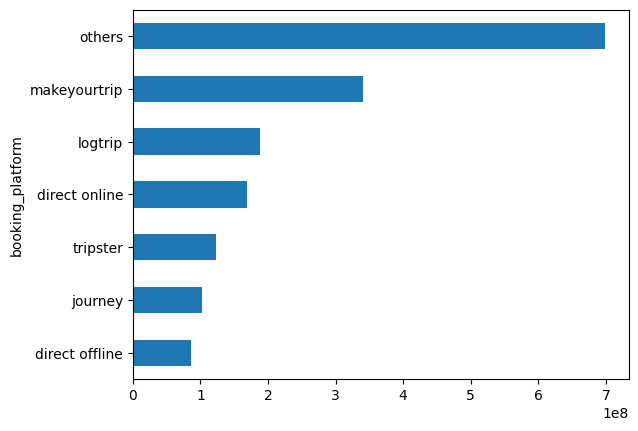

In [84]:
# calculate total revenue realized per booking platform
df_bookings.groupby('booking_platform')['revenue_realized'].sum().sort_values().plot.barh()

 2. Compare revenue realized per city

In [57]:
# Get city information from the hotel table
rev_city = pd.merge(df_bookings, df_hotels, on = 'property_id')
rev_city.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,2022-04-30,2022-01-05,2022-02-05,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,2022-04-27,2022-01-05,2022-02-05,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,2022-01-05,2022-01-05,2022-03-05,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,2022-04-28,2022-01-05,2022-06-05,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,2022-04-26,2022-01-05,2022-03-05,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi


In [58]:
# calculate revenue_realized per city
rev_city.groupby('city')['revenue_realized'].sum()

city
Bangalore    420383550
Delhi        294404488
Hyderabad    325179310
Mumbai       668569251
Name: revenue_realized, dtype: int64

 3. Compare average ratings per city

In [59]:
# calculate average rating per city
rev_city.groupby('city')['ratings_given'].mean().round(2).sort_values(ascending=False)

city
Delhi        3.78
Hyderabad    3.66
Mumbai       3.65
Bangalore    3.41
Name: ratings_given, dtype: float64

 4. Find revenue realized per hotel type

<Axes: ylabel='revenue_realized'>

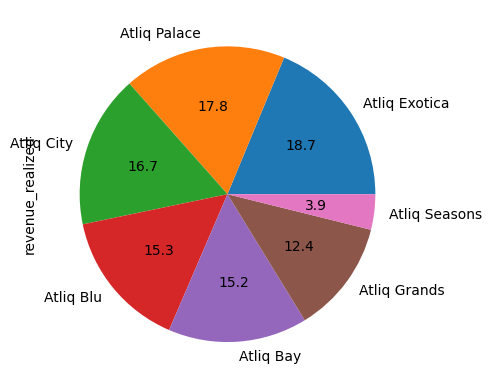

In [60]:
# calculate revenue_realized per hotel type
rev_city.groupby('property_name')['revenue_realized'].sum().sort_values(ascending=False).plot.pie(autopct="%.1f")

 5. Find month by month revenue

In [61]:
# Get month information by join bookings and date tables
rev_day = pd.merge(df_bookings, df_date, left_on = 'check_in_date', right_on = 'date')
# Drop duplicate column
rev_day.drop('date', axis=1, inplace=True)
rev_day

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,mmm yy,week no,day_type
0,May052216558RT11,16558,2022-04-15,2022-05-05,2022-07-05,3.0,RT1,tripster,5.0,Checked Out,10010,10010,May 22,W 19,weekeday
1,May052216558RT12,16558,2022-04-30,2022-05-05,2022-07-05,2.0,RT1,others,NaN,Cancelled,9100,3640,May 22,W 19,weekeday
2,May052216558RT13,16558,2022-01-05,2022-05-05,2022-06-05,3.0,RT1,direct offline,5.0,Checked Out,10010,10010,May 22,W 19,weekeday
3,May052216558RT14,16558,2022-03-05,2022-05-05,2022-06-05,2.0,RT1,tripster,3.0,Checked Out,9100,9100,May 22,W 19,weekeday
4,May052216558RT15,16558,2022-04-30,2022-05-05,2022-10-05,4.0,RT1,others,4.0,Checked Out,10920,10920,May 22,W 19,weekeday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92573,Jul312217564RT45,17564,2022-07-30,2022-07-31,2022-01-08,2.0,RT4,others,2.0,Checked Out,32300,32300,Jul 22,W 32,weekend
92574,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-03-08,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300,Jul 22,W 32,weekend
92575,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-02-08,1.0,RT4,tripster,NaN,Cancelled,32300,12920,Jul 22,W 32,weekend
92576,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-01-08,2.0,RT4,logtrip,2.0,Checked Out,32300,32300,Jul 22,W 32,weekend


In [62]:
# calculate revenue_realized per month
rev_day.groupby('mmm yy')['revenue_realized'].sum()

mmm yy
Jul 22    389940912
Jun 22    377191229
May 22    408375641
Name: revenue_realized, dtype: int64

 6. Calculate Average occupancy rate in each of the room categories

In [63]:
# Use room_class instead of room id for better interpretation
avg_occ = pd.merge(df_agg_bookings, df_rooms, left_on = 'room_category', right_on = 'room_id')
# Drop duplicate column
avg_occ.drop('room_id', axis=1, inplace=True)
avg_occ.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,2022-05-01,RT1,25,30.0,83.33,Standard
1,19562,2022-05-01,RT1,28,30.0,93.33,Standard
2,19563,2022-05-01,RT1,23,30.0,76.67,Standard
3,16558,2022-05-01,RT1,18,19.0,94.74,Standard
4,17560,2022-05-01,RT1,28,40.0,70.00,Standard


In [64]:
# calculate average occupancy rate in each of the room class
g = avg_occ.groupby('room_class')
g.mean('occ_pct')['occ_pct'].round(2)

room_class
Elite           58.01
Premium         58.03
Presidential    59.28
Standard        57.89
Name: occ_pct, dtype: float64

 7. Calculate Average occupancy rate per city

In [65]:
# Get city information from the hotel table
occ_city = pd.merge(df_agg_bookings, df_hotels, on = 'property_id')
occ_city.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,property_name,category,city
0,16559,2022-05-01,RT1,25,30.0,83.33,Atliq Exotica,Luxury,Mumbai
1,16559,2022-05-01,RT2,35,41.0,85.37,Atliq Exotica,Luxury,Mumbai
2,16559,2022-05-01,RT3,27,32.0,84.38,Atliq Exotica,Luxury,Mumbai
3,16559,2022-05-01,RT4,17,18.0,94.44,Atliq Exotica,Luxury,Mumbai
4,16559,2022-05-02,RT1,20,30.0,66.67,Atliq Exotica,Luxury,Mumbai


In [66]:
# calculate average occupancy rate per city
occ_city.groupby('city')['occ_pct'].mean().round(2)

city
Bangalore    56.33
Delhi        61.51
Hyderabad    58.12
Mumbai       57.91
Name: occ_pct, dtype: float64

 8. Compare the weekday occupancy with the weekend occupancy

In [67]:
# Get weekday/weekend information from the date table
occ_day = pd.merge(df_agg_bookings, df_date, left_on = 'check_in_date', right_on = 'date')
# Drop duplicate column
occ_day.drop('date', axis=1, inplace=True)
occ_day.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,mmm yy,week no,day_type
0,16559,2022-05-01,RT1,25,30.0,83.33,May 22,W 19,weekend
1,19562,2022-05-01,RT1,28,30.0,93.33,May 22,W 19,weekend
2,19563,2022-05-01,RT1,23,30.0,76.67,May 22,W 19,weekend
3,16558,2022-05-01,RT1,18,19.0,94.74,May 22,W 19,weekend
4,17560,2022-05-01,RT1,28,40.0,70.00,May 22,W 19,weekend


<Axes: ylabel='day_type'>

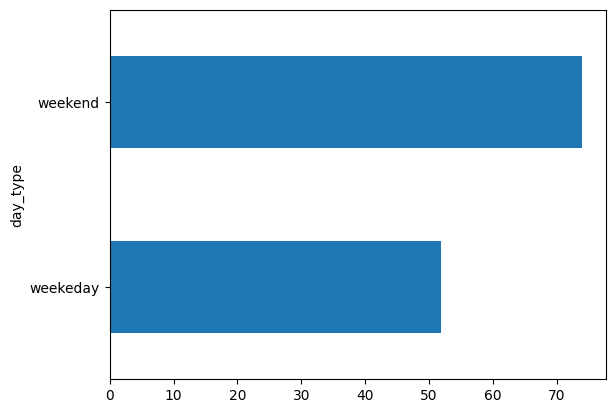

In [68]:
# calculate average occupancy rate of weekday and weekend
occ_day.groupby('day_type')['occ_pct'].mean().plot(kind='barh')

 9. In the month of June, what is the occupancy of different cities

In [69]:
# Get city and month information by join agg_bookings, hotels and date tables
occ = pd.merge(occ_city, df_date, left_on = 'check_in_date', right_on = 'date')
# Drop duplicate column
occ.drop('date', axis=1, inplace=True)
occ.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,property_name,category,city,mmm yy,week no,day_type
0,16559,2022-05-01,RT1,25,30.0,83.33,Atliq Exotica,Luxury,Mumbai,May 22,W 19,weekend
1,16559,2022-05-01,RT2,35,41.0,85.37,Atliq Exotica,Luxury,Mumbai,May 22,W 19,weekend
2,16559,2022-05-01,RT3,27,32.0,84.38,Atliq Exotica,Luxury,Mumbai,May 22,W 19,weekend
3,16559,2022-05-01,RT4,17,18.0,94.44,Atliq Exotica,Luxury,Mumbai,May 22,W 19,weekend
4,19562,2022-05-01,RT1,28,30.0,93.33,Atliq Bay,Luxury,Bangalore,May 22,W 19,weekend


In [70]:
# calculate occupancy of different cities in June
occ[occ['mmm yy']=='Jun 22'].groupby('city')['occ_pct'].mean().round(2).sort_values(ascending=False)

city
Delhi        61.46
Mumbai       57.79
Hyderabad    57.69
Bangalore    55.85
Name: occ_pct, dtype: float64

In [80]:
df_hotels.city.unique()

array(['Delhi', 'Mumbai', 'Hyderabad', 'Bangalore'], dtype=object)